# Implémentation de l'exemple avec Python

In [1]:
#Importer les bibliothèques nécessaires 
import numpy as np # Pour effectuer des calculs mathématiques-algèbre linéaire
import pandas as pd # Pour le traitement des données tabulaires
import seaborn as sns # pour créer les graphiques
import matplotlib.pyplot as plt # pour visualiser les graphiques
from scipy import stats # pour réaliser les calculs des coefficients statistiques

In [2]:
# Importation du jeu de données
data= pd.read_csv('Vente.csv', sep=';')
#visualisation des cinq premières lignes du tableau de données
data.head()

,visites,log_vendus
0,17,42
1,45,75
2,20,40
3,30,60
4,15,45


## Phase 1: Explorer la relation entre les deux variables


### Vérifier que les deux variables : nombre de logiciels vendus et nombre de visites sont distribuées approximativement selon la loi normale
### Vérifier qu'il existe une relation linéaire entre le nombre de logiciels vendus et le nombre de visites effectuées

In [3]:
#Vérifier le type de chaque variable et le nombre de valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   visites     15 non-null     int64
 1   log_vendus  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


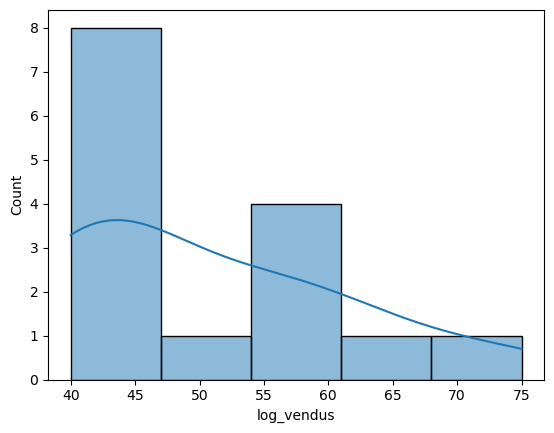

In [4]:
sns.histplot(data = data, x = 'log_vendus', kde=True );

In [5]:
# Réaliser le test de normalité de Shapiro Wilk
stats.shapiro(data['log_vendus'])

ShapiroResult(statistic=0.8777926564216614, pvalue=0.043985847383737564)

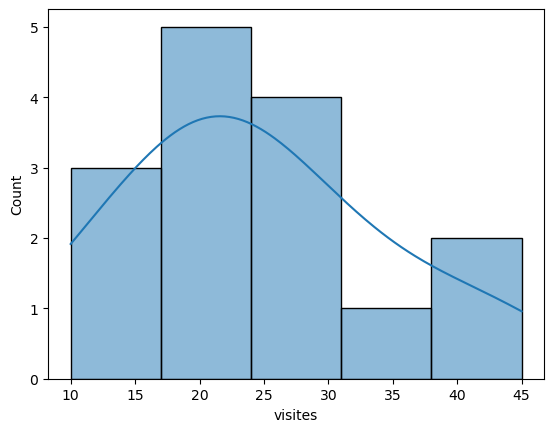

In [6]:
sns.histplot(data = data, x = 'visites', kde=True );

In [7]:
# Réaliser le test de normalité de Shapiro Wilk
stats.shapiro(data['visites'])

ShapiroResult(statistic=0.9599021673202515, pvalue=0.6906953454017639)

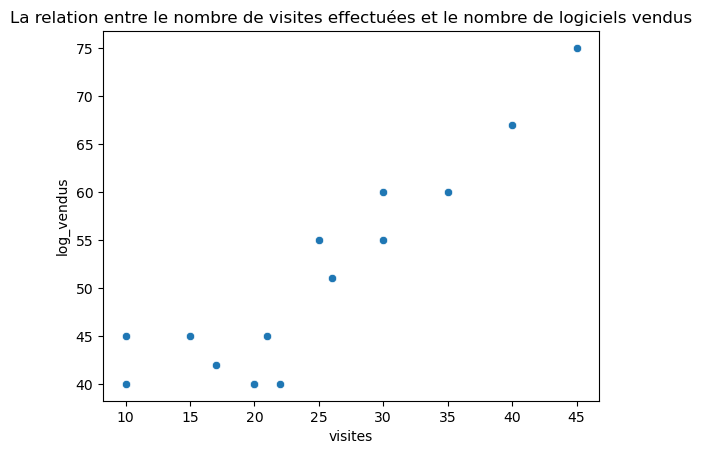

In [8]:
#Tracer le diagramme de dispersion entre le nombre de visites effectuées et le nombre de logiciels vendus 
sns.scatterplot(x = 'visites', y = 'log_vendus', data= data)
plt.title('La relation entre le nombre de visites effectuées et le nombre de logiciels vendus')
plt.show()

In [9]:
#Calcul du coefficient de corrélation de Pearson
stats.pearsonr(data['visites'],data['log_vendus'])

PearsonRResult(statistic=0.905980871033603, pvalue=3.3116770460015733e-06)

### Il existe une relation linéaire positive forte (r= 0,9) entre le nombre de visites effectuées et le nombre de logiciels vendus. Le coefficient de corrélation est significatif (p-value<5%)

# Phase 2: Trouver la droite de régression

In [10]:
# Trouver la droite de régression linéaire 
#Importer les packages de la régression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

#Spécification du modèle de régression
X = data[['visites']] # doit etre un array à deux dimensions
Y = data[['log_vendus']]
model = LinearRegression() #créer l'objet de la régression
model.fit(X,Y)

LinearRegression()

In [11]:
#Déterminer les coefficients de la droite de régression
ordonnee_origine = model.intercept_
pente = model.coef_
coefficient_determination = model.score(X,Y) # on peut utiliser aussi: r2_score(Y,y_estime))
print("L'ordonnée à l'origine est", ordonnee_origine,"\n"
      "La pente est ", pente,"\n"
      "Le coefficient de détermination est ", coefficient_determination)

L'ordonnée à l'origine est [26.8283548] 
La pente est  [[0.97697999]] 
Le coefficient de détermination est  0.8208013386788059


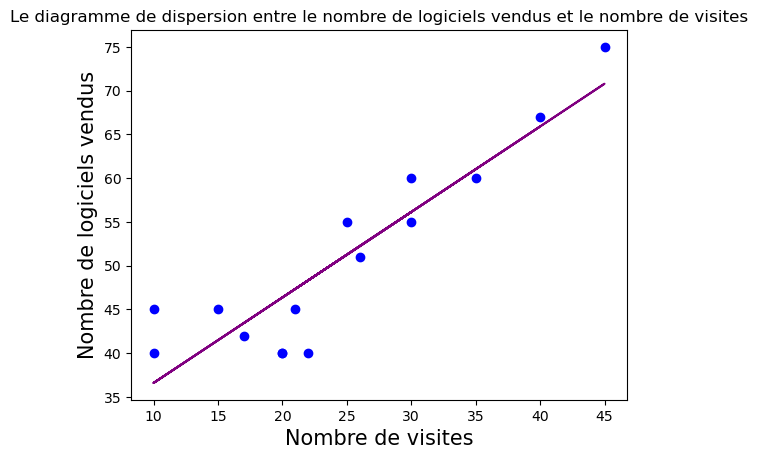

In [12]:
#Visualiser la droite de régression
%matplotlib inline
plt.xlabel('Nombre de visites', fontsize=15)
plt.ylabel('Nombre de logiciels vendus', fontsize=15)
plt.scatter(x = 'visites', y = 'log_vendus', data= data, color= 'blue')
plt.title('Le diagramme de dispersion entre le nombre de logiciels vendus et le nombre de visites')
plt.plot(data.visites,model.predict(data[['visites']]), color= 'purple');

# Phase 3: Analyser le modèle

In [13]:
#Trouver le coefficient de détermination
R2 = model.score(X,Y)
print('Le coefficient de détermination est ', R2)

Le coefficient de détermination est  0.8208013386788059


In [14]:
# déterminer le nombre de logiciels vendus estimés
y_estime = model.predict(X)
print(y_estime)

[[43.43701471]
 [70.79245455]
 [46.36795469]
 [56.13775464]
 [41.48305472]
 [36.59815475]
 [46.36795469]
 [51.25285466]
 [52.22983466]
 [56.13775464]
 [36.59815475]
 [48.32191468]
 [65.90755458]
 [47.34493469]
 [61.02265461]]


In [15]:
#Déterminer la variation résiduelle totale
SSR= ((Y-y_estime)**2).sum()
print('La variation résiduelle totale est ',SSR)

La variation résiduelle totale est  log_vendus    304.159861
dtype: float64


In [16]:
#Déterminer l'erreur type d'estimation
Erreur_type = (SSR/(data.count()-2))**0.5
print('Erreur type estimation est', Erreur_type )

Erreur type estimation est log_vendus    4.837035
visites            NaN
dtype: float64


In [17]:
# Déterminer la variation expliquée
SSE = ((Y-Y.mean())**2).sum()
print('La variation expliquée est', SSE)

La variation expliquée est log_vendus    1697.333333
dtype: float64


# Phase 4: Prévoir le nombre de logiciels vendus

In [18]:
# Prévoir le nombre de logiciels vendus pour 40 visites
import warnings
warnings.filterwarnings("ignore")
logi_vendus_predict= model.predict([[40]])
print('Le nombre de logiciels vendus est ', logi_vendus_predict)

Le nombre de logiciels vendus est  [[65.90755458]]


In [19]:
# Intervalle de confiance de la prévision 
alpha = 0.05
dof = len(X)-2
t_val = stats.t.isf(alpha/2, dof)
Marge_erreur= t_val*Erreur_type*0.48
LI_IC = int(logi_vendus_predict) - Marge_erreur
LS_IC = int(logi_vendus_predict) + Marge_erreur
print(LI_IC, LS_IC)

log_vendus    59.984106
visites             NaN
dtype: float64 log_vendus    70.015894
visites             NaN
dtype: float64
